In [2]:
import numpy as np
import h5py as hdf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def retrieve_spectrum_pandas(filename):
    """ Returns a pandas dataframe with all speparate spectra.
    """
    df = pd.DataFrame()
    with hdf.File(filename, 'r') as f:
        for ds in f:
            data = {
                'lambda' : float(ds.split('_')[-1]),
                'spectrum' : [f[ds][:]]
            }
            df = df.append(pd.DataFrame(data), ignore_index=True)
    
    df = df.sort_values(by='lambda')   
    return df


def retrieve_spectrum_numpy(filename, cutoff=20):
    """ Returns a 2D numpy array with all the information.
    """
    data = {}
    lambdas = []
    with hdf.File(filename, 'r') as f:
        for ds in f:
            lam = ds.split('_')[-1]
            data[lam] = f[ds][:]
            lambdas.append(float(lam))
    lambdas = sorted(lambdas)
    
    spectrum = np.zeros(shape=(len(lambdas),cutoff))
    for k, key in enumerate(lambdas):
        spectrum[k,:] = data['{:.6f}'.format(key)][:cutoff]
    return np.array(lambdas), spectrum


### 2x2x2 system - bosons

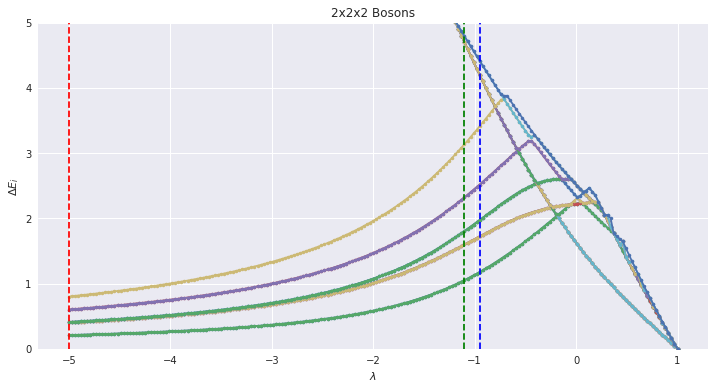

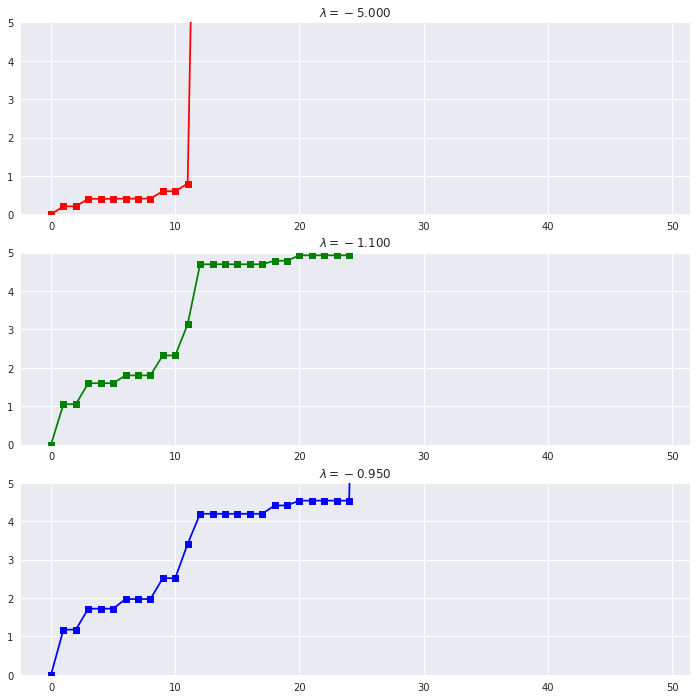

In [5]:
# Read the data.
datafile = '../python_data/multi_spectrum_bosons_2x2x2.hdf5'
lambdas, data = retrieve_spectrum_numpy(datafile)
df = retrieve_spectrum_pandas(datafile)

colors = ['red', 'green', 'blue', 'orange', 'cyan']

# Index of lambda values to display (can be as many as you want).
lam_indicies = [0, 130, 135]

with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
    fig.set_size_inches(12, 6)
    
    # Toggls the number of levels only in the upper plot.
    n_states = 20
    
    
    gs = data[:,0]
    for i in range(1, n_states):
        bx.plot(lambdas, data[:,i]-gs, marker='.', ls='-')
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 5)
    bx.set_title('2x2x2 Bosons')
    

    # -----------------------------------------------------------------------
    # Vertical cuts at constant lambda.

    # Toggls how many values to display (starting from the GS) in the detail plots.
    n_display_values = 120
    
    fig, ax = plt.subplots(len(lam_indicies),1, squeeze=False)
    fig.set_size_inches(12, len(lam_indicies)*4)
    
    for k, lam_index in enumerate(lam_indicies):
        data = df.iloc[lam_index]
        gs = data['spectrum'][0]
        ax[k,0].plot(data['spectrum'][:n_display_values]-gs, marker='s', color=colors[k])
        ax[k,0].set_title('$\\lambda = {:.3f}$'.format(data['lambda']))
        bx.axvline(data['lambda'], ls='--', color=colors[k])
        
        ax[k,0].set_ylim(0, 5)

## Fermions 2x2x2

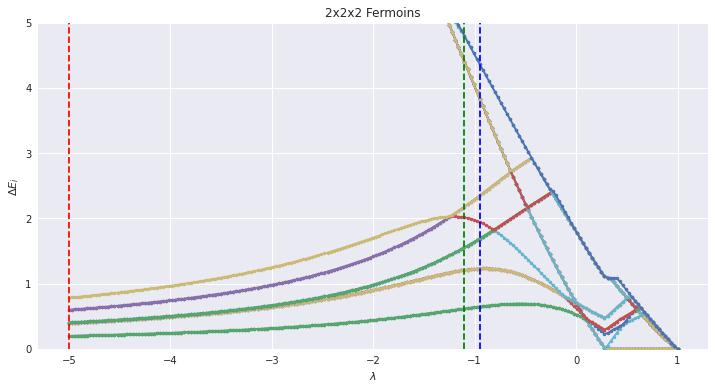

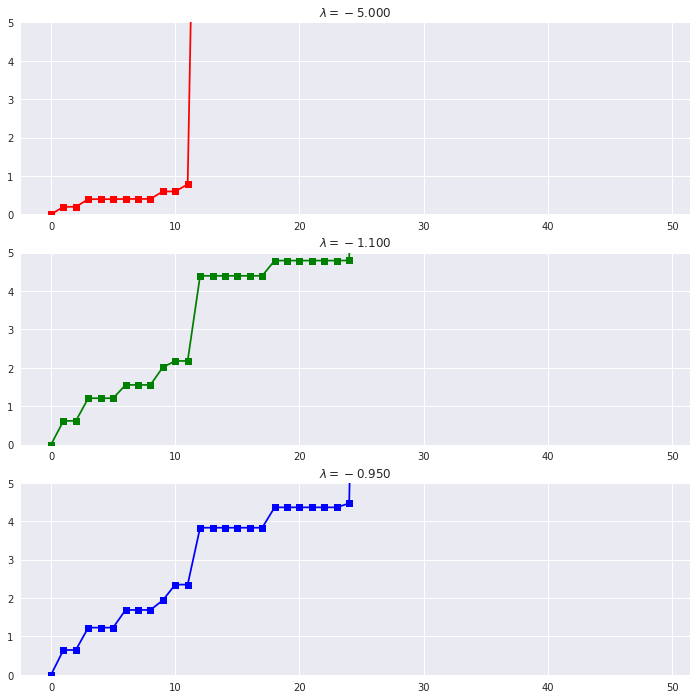

In [6]:
# Read the data.
datafile = '../python_data/multi_spectrum_fermions_2x2x2.hdf5'
lambdas, data = retrieve_spectrum_numpy(datafile)
df = retrieve_spectrum_pandas(datafile)

colors = ['red', 'green', 'blue', 'orange', 'cyan']

# Index of lambda values to display (can be as many as you want).
lam_indicies = [0, 130, 135]

with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
    fig.set_size_inches(12, 6)
    
    # Toggls the number of levels only in the upper plot.
    n_states = 20
    
    
    gs = data[:,0]
    for i in range(1, n_states):
        bx.plot(lambdas, data[:,i]-gs, marker='.', ls='-')
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 5)
    bx.set_title('2x2x2 Fermoins')
    

    # -----------------------------------------------------------------------
    # Vertical cuts at constant lambda.

    # Toggls how many values to display (starting from the GS) in the detail plots.
    n_display_values = 120
    
    fig, ax = plt.subplots(len(lam_indicies),1, squeeze=False)
    fig.set_size_inches(12, len(lam_indicies)*4)
    
    for k, lam_index in enumerate(lam_indicies):
        data = df.iloc[lam_index]
        gs = data['spectrum'][0]
        ax[k,0].plot(data['spectrum'][:n_display_values]-gs, marker='s', color=colors[k])
        ax[k,0].set_title('$\\lambda = {:.3f}$'.format(data['lambda']))
        bx.axvline(data['lambda'], ls='--', color=colors[k])
        
        ax[k,0].set_ylim(0, 5)

## Bosons, $2\times2\times4$

[0.         0.33113939 0.75971715 0.77812953 0.86928145 0.96404398
 0.96404398 0.97347577 0.97347577 1.11916566 1.36794443 1.60840734
 1.84445364 1.84445364 2.11350741 2.34151311 2.38608741 2.38608741
 2.49984632 2.49984632 2.49984632 2.51083193 2.51083193 2.51083193
 2.5992747  2.60885099 2.60885099 2.66443683 2.66443683 2.69561611]


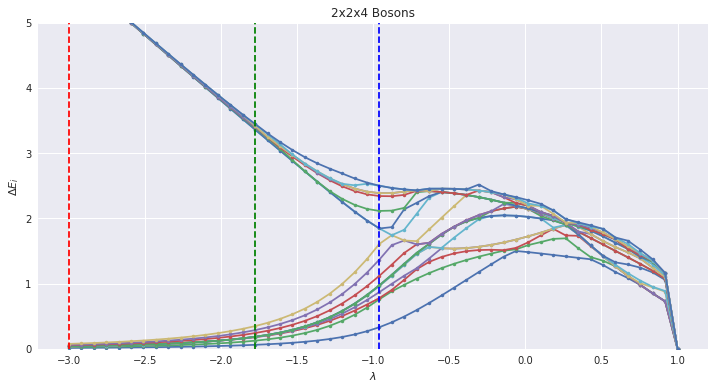

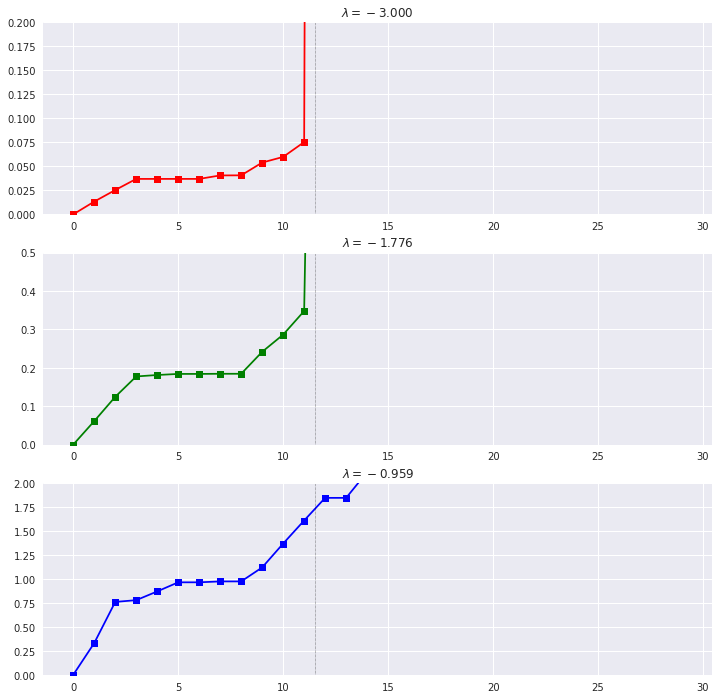

In [53]:
# Read the data.
datafile = '../python_data/multi_spectrum_bosons_wx_4-wy_4-wz_2_2x2x4.dat'
lambdas, data = retrieve_spectrum_numpy(datafile)
df = retrieve_spectrum_pandas(datafile)

colors = ['red', 'green', 'blue', 'orange', 'cyan']

# Index of lambda values to display (can be as many as you want).
lam_indicies = [0, 15, 25]

with plt.style.context('seaborn'):
    fig, bx = plt.subplots()
    fig.set_size_inches(12, 6)
    
    # Toggls the number of levels only in the upper plot.
    n_states = 20
    
    
    gs = data[:,0]
    for i in range(1, n_states):
        bx.plot(lambdas, data[:,i]-gs, marker='.', ls='-')
        
    bx.set_xlabel('$\\lambda$')
    bx.set_ylabel('$\\Delta E_i$')
    bx.set_ylim(0, 5)
    bx.set_title('2x2x4 Bosons')
    

    # -----------------------------------------------------------------------
    # Vertical cuts at constant lambda.

    # Toggls how many values to display (starting from the GS) in the detail plots.
    n_display_values = 120
    
    fig, ax = plt.subplots(len(lam_indicies),1, squeeze=False)
    fig.set_size_inches(12, len(lam_indicies)*4)
    
    for k, lam_index in enumerate(lam_indicies):
        data = df.iloc[lam_index]
        gs = data['spectrum'][0]
        ax[k,0].plot(data['spectrum'][:n_display_values]-gs, marker='s', color=colors[k])
        ax[k,0].set_title('$\\lambda = {:.3f}$'.format(data['lambda']))
        bx.axvline(data['lambda'], ls='--', color=colors[k])
        ax[k,0].axvline(11.5, ls=':', color='black', lw=0.5)
        
    ax[0,0].set_ylim(0, 0.2)
    ax[1,0].set_ylim(0, 0.5)
    ax[2,0].set_ylim(0, 2)
    
print(data['spectrum'][:n_display_values]-gs)

## Direct comparison of bosonic spectra.

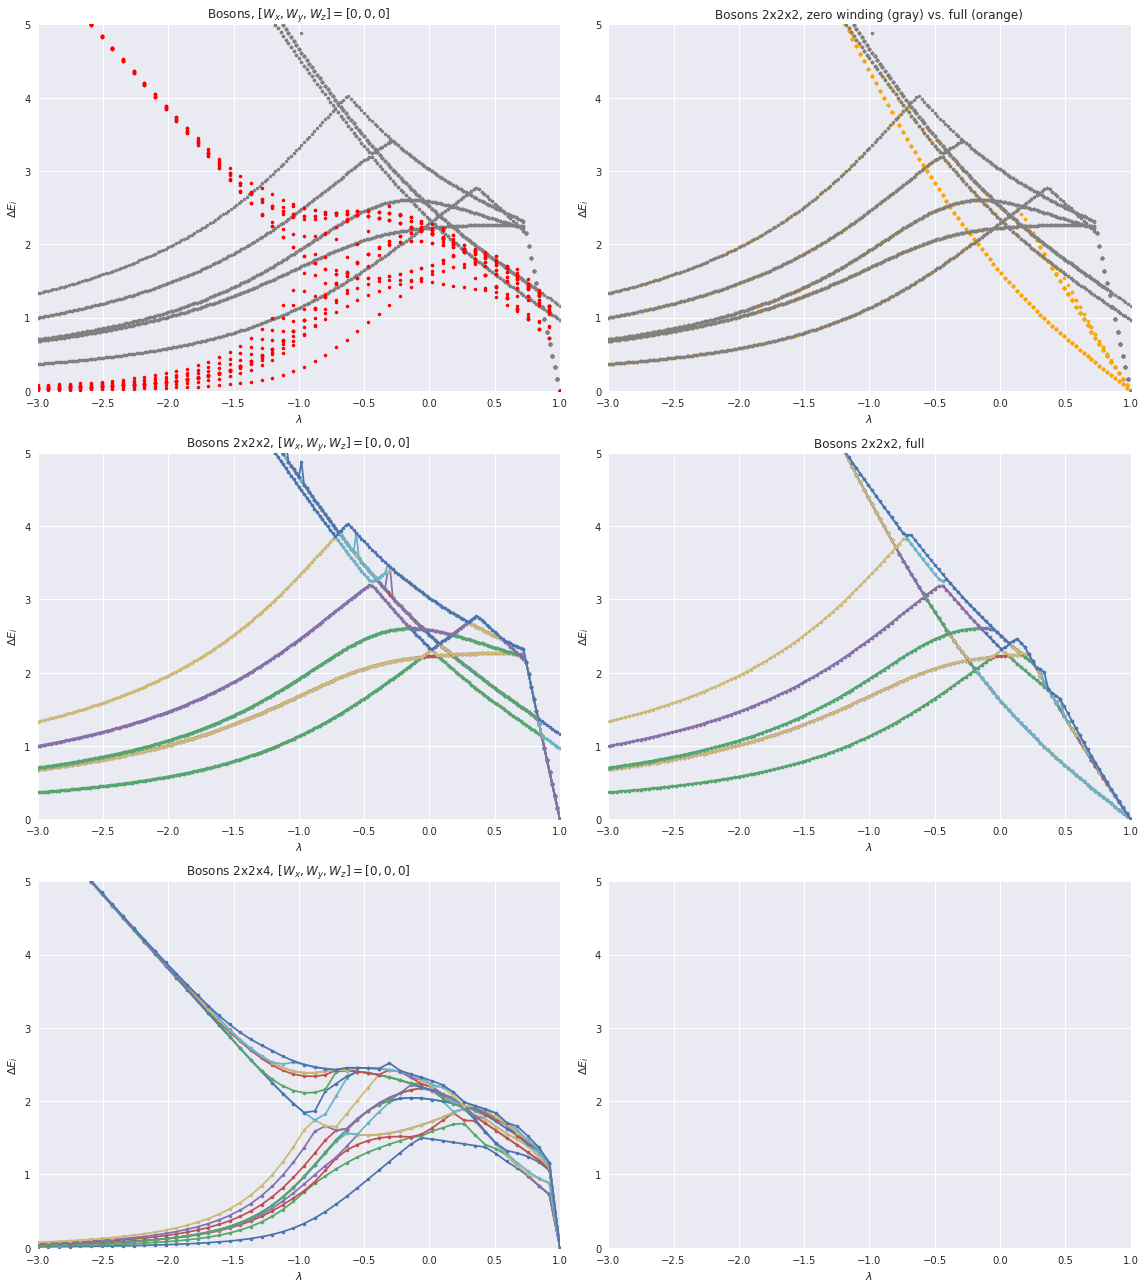

In [48]:
# Read the data.
datafiles = {
    '2x2x2' : '../python_data/multi_spectrum_bosons_wx_2-wy_2-wz_2_2x2x2.dat',
    '2x2x4' : '../python_data/multi_spectrum_bosons_wx_4-wy_4-wz_2_2x2x4.dat'
}
datafiles_full = {
    '2x2x2' : '../python_data/multi_spectrum_bosons_2x2x2.hdf5'
}
colors = {
    '2x2x2' : 'gray',
    '2x2x4' : 'red'
}

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(3,2, squeeze=False)
    fig.set_size_inches(16, 18)
    
    n_states = 20
    
    # ---
    # Plot only (0,0,0) winding sector.
    
    for k, (label, datafile) in enumerate(datafiles.items()):
        lambdas, data = retrieve_spectrum_numpy(datafile, cutoff=n_states)
        df = retrieve_spectrum_pandas(datafile)
        gs = data[:,0]
        for i in range(1, n_states):
            ax[0,0].plot(lambdas, data[:,i]-gs, marker='.', ls='', color=colors[label])
            ax[k+1,0].plot(lambdas, data[:,i]-gs, marker='.', ls='-')
            
    # ---
    # Comparison to full spectrum (only for 2x2x2).
    
    # Full data.
    lambdas, data = retrieve_spectrum_numpy(datafiles['2x2x2'], cutoff=n_states)
    df = retrieve_spectrum_pandas(datafiles['2x2x2'])
    gs = data[:,0]
    for i in range(1, n_states):
        ax[0,1].plot(lambdas, data[:,i]-gs, marker='.', ls='', color='gray', zorder=10)
        
    # WS 000
    lambdas, data = retrieve_spectrum_numpy(datafiles_full['2x2x2'], cutoff=n_states)
    df = retrieve_spectrum_pandas(datafiles_full['2x2x2'])
    gs = data[:,0]
    for i in range(1, n_states):
        ax[0,1].plot(lambdas, data[:,i]-gs, marker='.', ls='', color='orange', zorder=5)
        ax[1,1].plot(lambdas, data[:,i]-gs, marker='.', ls='-')

            
    for k in range(3):
        for j in range(2):
            ax[k,j].set_xlabel('$\\lambda$')
            ax[k,j].set_ylabel('$\\Delta E_i$')
            ax[k,j].set_ylim(0, 5)
            ax[k,j].set_xlim(-3,1)
    ax[0,0].set_title('Bosons, $[W_x, W_y, W_z] = [0,0,0]$')
    ax[1,0].set_title('Bosons 2x2x2, $[W_x, W_y, W_z] = [0,0,0]$')
    ax[2,0].set_title('Bosons 2x2x4, $[W_x, W_y, W_z] = [0,0,0]$')
    
    
    ax[0,1].set_title('Bosons 2x2x2, zero winding (gray) vs. full (orange)')
    ax[1,1].set_title('Bosons 2x2x2, full')
    
    fig.tight_layout()
    fig.savefig('bosons_spectrum_comparison.png')